In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
pd.set_option('display.max_rows', 1000)

In [4]:
initialisation_data = pd.read_csv("/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/batchrunners/scenarios/data/intialisation_runs/price_duration_curve.csv")

initialisation_data = initialisation_data[(initialisation_data.year==2018) & (initialisation_data['Unnamed: 0']<20)]
initialisation_data

,Unnamed: 0,accepted_price,segment_demand,segment_hour,year
0,0,40.041188,17568.0,8752.50,2018
1,1,45.200908,21964.0,8291.83,2018
2,2,50.354534,23127.0,7831.17,2018
3,3,50.961013,24327.0,7370.50,2018
4,4,51.570534,25520.0,6909.92,2018
5,5,51.571638,26760.0,6449.25,2018
6,6,52.821219,27888.0,5988.58,2018
7,7,52.933442,28935.0,5527.92,2018
8,8,55.405407,29865.0,5067.25,2018
9,9,56.405025,30721.0,4606.58,2018


In [5]:
initialisation_data['run_num'] = [num for num in list(range(43)) for _ in range(20)]
# initialisation_data['run_num'] = [num for num in list(range(76)) for _ in range(20)]
initialisation_data

,Unnamed: 0,accepted_price,segment_demand,segment_hour,year,run_num
0,0,40.041188,17568.0,8752.50,2018,0
1,1,45.200908,21964.0,8291.83,2018,0
2,2,50.354534,23127.0,7831.17,2018,0
3,3,50.961013,24327.0,7370.50,2018,0
4,4,51.570534,25520.0,6909.92,2018,0
5,5,51.571638,26760.0,6449.25,2018,0
6,6,52.821219,27888.0,5988.58,2018,0
7,7,52.933442,28935.0,5527.92,2018,0
8,8,55.405407,29865.0,5067.25,2018,0
9,9,56.405025,30721.0,4606.58,2018,0


In [6]:
# initialisation_data[initialisation_data.accepted_price<100]

initialisation_data_filtered = initialisation_data.groupby('run_num').filter(lambda x: x['accepted_price'].max()<100 )

Import price duration curve from real data

In [7]:
real_data = pd.DataFrame({'segment_hour':[8752.5,8291.83,7831.17,7370.5,6910,6449.25,5988.58,5528,5067.25,4606.58,4146,3685.33,3224.67,2764,2303.33,1842.67,1382.08,921.42,460.75,0.08],'accepted_price':[36.94425, 42.324864, 44.200523,45.608519,46.865409,48.265227,49.869431,51.576545,53.43075,55.043326,56.71825,58.517,60.214477,62.087039,64.218659,66.348932,69.090683,72.199341,76.906955,89.285023]})



non_stochastic_data = pd.DataFrame({'segment_hour':[8752.5,8291.83,7831.17,7370.5,6910,6449.25,5988.58,5528,5067.25,4606.58,4146,3685.33,3224.67,2764,2303.33,1842.67,1382.08,921.42,460.75,0.08],'accepted_price':
                                    [49.616361,50.949766,51.050238,51.198431,51.198431,51.307289,51.307289,51.603196,51.647715,51.647715,51.669685,51.669685,51.732163,52.211052,52.422003,52.78828,52.80294,63.159773,63.871503,63.952106]})



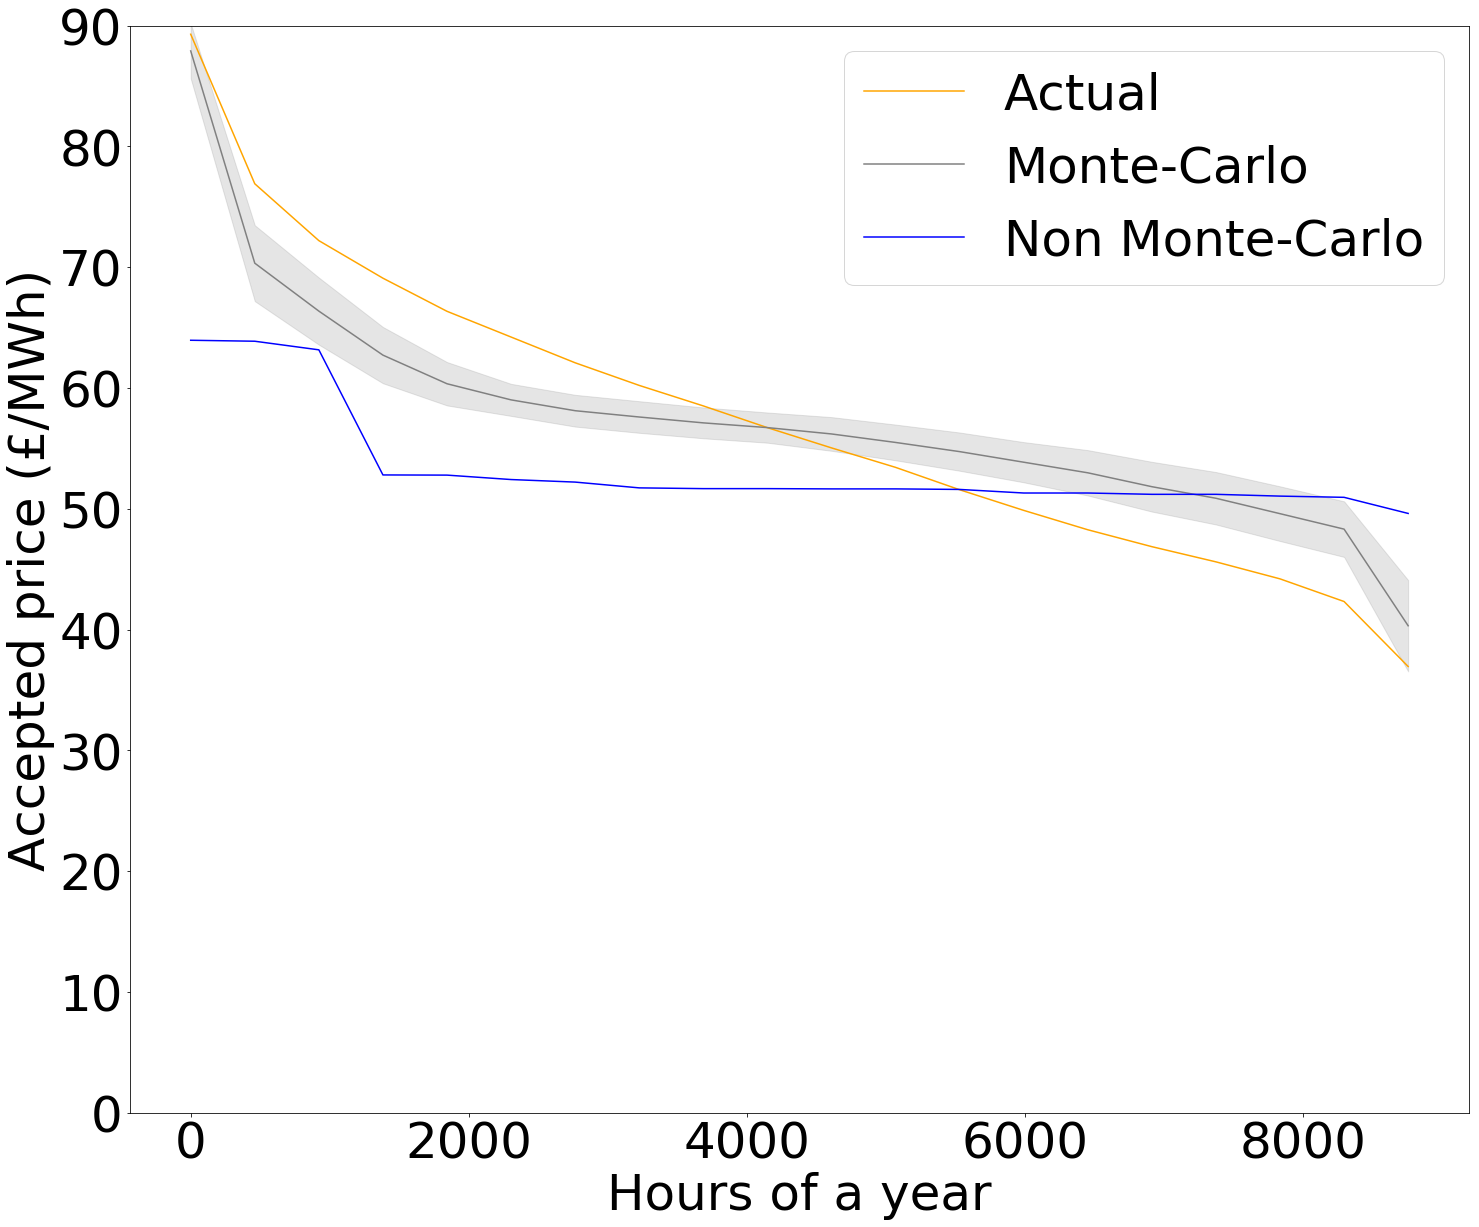

In [17]:
fig = plt.figure()
sns.lineplot(x="segment_hour", y="accepted_price", color="orange", label = "Actual", data = real_data)
sns.lineplot(x="segment_hour", y="accepted_price", color="grey", label = "Monte-Carlo", ci="sd", data = initialisation_data_filtered)
sns.lineplot(x="segment_hour", y="accepted_price", color="blue", label = "Non Monte-Carlo", data = non_stochastic_data)
plt.xlabel("Hours of a year")
plt.ylabel("Accepted price (£/MWh)")
# plt.title("Accepted Electricity Prices on the Wholesale Market during 2018 (UK)")
plt.ylim(0,90)
plt.legend()
# plt.rcParams['figure.figsize'] = 24, 20

# plt.rcParams.update({'font.size': 50})
fig.savefig("load_price_duration_curve_comparison.pdf", bbox_inches='tight')



In [9]:
print(non_stochastic_data.head())
print(real_data.head())
print(initialisation_data_filtered.head())

   segment_hour  accepted_price
0       8752.50       49.616361
1       8291.83       50.949766
2       7831.17       51.050238
3       7370.50       51.198431
4       6910.00       51.198431
   segment_hour  accepted_price
0       8752.50       36.944250
1       8291.83       42.324864
2       7831.17       44.200523
3       7370.50       45.608519
4       6910.00       46.865409
   Unnamed: 0  accepted_price  segment_demand  segment_hour  year  run_num
0           0       40.041188         17568.0       8752.50  2018        0
1           1       45.200908         21964.0       8291.83  2018        0
2           2       50.354534         23127.0       7831.17  2018        0
3           3       50.961013         24327.0       7370.50  2018        0
4           4       51.570534         25520.0       6909.92  2018        0


In [10]:
non_stochastic_mean = non_stochastic_data.accepted_price.mean()
stochastic_mean = initialisation_data_filtered.accepted_price.mean()
stochastic_std_dev = initialisation_data_filtered.accepted_price.std()
real_mean = real_data.accepted_price.mean()
stochastic_std_dev

9.638851231855819

In [11]:
non_stochastic_mae = mean_absolute_error(real_data.accepted_price, non_stochastic_data.accepted_price)
non_stochastic_mae
non_stochastic_mse = mean_squared_error(real_data.accepted_price, non_stochastic_data.accepted_price)

In [12]:
mean_pdc = initialisation_data_filtered.groupby('Unnamed: 0').accepted_price.mean()
std_pdc = initialisation_data_filtered.groupby('Unnamed: 0').std()
std_pdc
initialisation_data_filtered.accepted_price.std()

9.638851231855819

In [13]:
stochastic_mae = mean_absolute_error(real_data.accepted_price, mean_pdc)
stochastic_mse = mean_squared_error(real_data.accepted_price, mean_pdc)
stochastic_mae

3.9707301283232055

In [14]:

d = {"Figure":['Avg. Price (\\textsterling/MWh)', 'Std. dev (\\textsterling/MWh)','MAE (\\textsterling/MWh)', 'RMSE (\\textsterling/MWh)'], 'N2EX Day Ahead':[round(real_mean,2),'-','-','-'], 'ElecSIM':[stochastic_mean,stochastic_std_dev,stochastic_mae, sqrt(stochastic_mse)],'Non-Stochastic':[round(non_stochastic_mean,2),'-',round(non_stochastic_mae,2), round(sqrt(non_stochastic_mse),2)]}
intialisation_table = pd.DataFrame(data=d)
intialisation_table = intialisation_table.round(2)
intialisation_table = intialisation_table.set_index('Figure')
intialisation_table

,N2EX Day Ahead,ElecSIM,Non-Stochastic
Figure,,,
Avg. Price (\textsterling/MWh),57.49,57.52,53.39
Std. dev (\textsterling/MWh),-,9.64,-
MAE (\textsterling/MWh),-,3.97,8.35
RMSE (\textsterling/MWh),-,4.41,10.2


In [15]:
intialisation_table.to_csv('initialisation_run_validation.csv')